In [1]:
import pandas as pd

# GPT

In [2]:
gpt_result = pd.read_excel('..\ZSP_baseline\gpt_mal_pypi_eval2.xlsx')

In [3]:
gpt_result.columns

Index(['package_name', 'benign_files', 'malicious_files',
       'malicious_file_scores', 'malicious_file_explanations',
       'overall_classification', 'overall_Score', 'overall_Explanation'],
      dtype='object')

In [4]:
gpt_result['overall_classification'].value_counts()

overall_classification
 1    1503
 0     408
-1       2
Name: count, dtype: int64

# LLAMA

In [5]:
llama_result = pd.read_excel('..\ZSP_baseline\llama-3.3-70B-Instruct_eval2.xlsx')

In [6]:
llama_result['overall_classification'].value_counts()

overall_classification
 1    1577
-1     180
 0     149
Name: count, dtype: int64

#Analysis

In [7]:
# Step 1: Count the number of accurate predictions (where overall_classification is expected to be 1)
expected_classification = 1

gpt_correct_predictions = (gpt_result['overall_classification'] == expected_classification).sum()
llama_correct_predictions = (llama_result['overall_classification'] == expected_classification).sum()

# Step 2: Count the number of rows where malicious_files is not empty ([] or NaN)
gpt_malicious_count = gpt_result['malicious_files'].apply(lambda x: isinstance(x, str) and len(x) > 2).sum()
llama_malicious_count = llama_result['malicious_files'].apply(lambda x: isinstance(x, str) and len(x) > 2).sum()


In [8]:
# Step 2: Count the number of rows where malicious_files is not empty ([] or NaN)
gpt_malicious_count = gpt_result['malicious_files'].apply(lambda x: isinstance(x, str) and len(x) > 2).sum()
llama_malicious_count = llama_result['malicious_files'].apply(lambda x: isinstance(x, str) and len(x) > 2).sum()


In [12]:
# Step 3: Identify common malicious files
import ast

def extract_files(file_list):
    """ Convert string representation of list to a real list """
    try:
        return set(ast.literal_eval(file_list)) if isinstance(file_list, str) and file_list not in ["[]", ""] else set()
    except (ValueError, SyntaxError):
        return set()

gpt_malicious_files = gpt_result['malicious_files'].apply(extract_files)
llama_malicious_files = llama_result['malicious_files'].apply(extract_files)

# Flatten and get unique malicious files
gpt_all_malicious = set().union(*gpt_malicious_files)
llama_all_malicious = set().union(*llama_malicious_files)
common_malicious_files = gpt_all_malicious.intersection(llama_all_malicious)


In [11]:
# Step 4: Word frequency analysis for malicious files
from collections import Counter

# Flatten the list of malicious files
gpt_malicious_flat = [file for sublist in gpt_malicious_files for file in sublist]
llama_malicious_flat = [file for sublist in llama_malicious_files for file in sublist]

# Count occurrences of malicious files
gpt_file_counts = Counter(gpt_malicious_flat)
llama_file_counts = Counter(llama_malicious_flat)

# Combine counts for common malicious files
total_file_counts = gpt_file_counts + llama_file_counts

# Get top 10 most frequent malicious files
top_10_malicious = total_file_counts.most_common(10)

# Convert to DataFrame for plotting
malicious_df = pd.DataFrame(top_10_malicious, columns=['Malicious File', 'Count'])

# Display results
malicious_df

,Malicious File,Count
0,setup.py,2786
1,__init__.py,596
2,PKG-INFO,474
3,top_level.txt,462
4,main.py,384
5,requires.txt,196
6,README.md,103
7,not-zip-safe,89
8,__init__py.py,74
9,README.rst,72


In [15]:
# Step 5: Generate visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(total_file_counts)


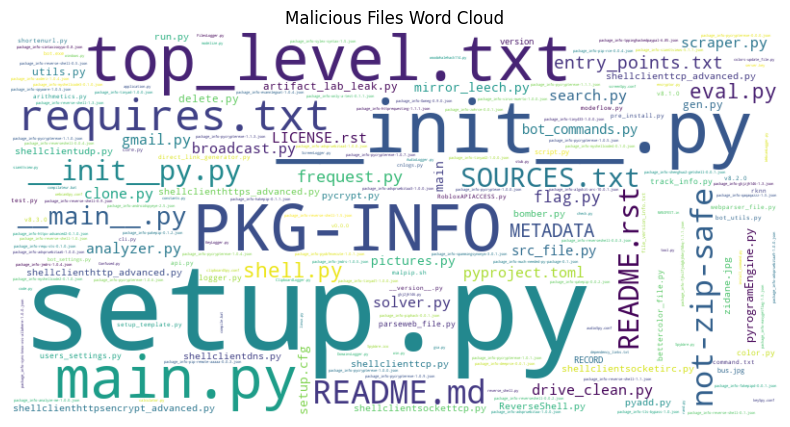

In [16]:
# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Malicious Files Word Cloud")
plt.show()

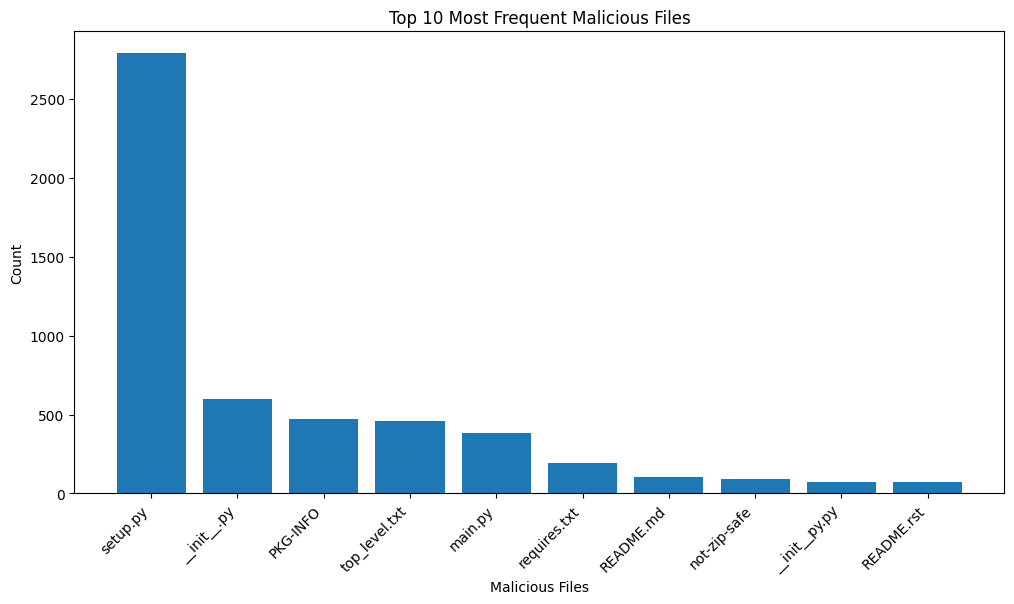

In [17]:
# Plot bar chart of top 10 malicious files
plt.figure(figsize=(12, 6))
plt.bar(malicious_df['Malicious File'], malicious_df['Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Malicious Files")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent Malicious Files")
plt.show()

In [ ]:
# Step 1: Count the number of accurate predictions (where overall_classification is expected to be 1)
expected_classification = 1

gpt_correct_predictions = (gpt_result['overall_classification'] == expected_classification).sum()
llama_correct_predictions = (llama_result['overall_classification'] == expected_classification).sum()

# Step 2: Count the number of rows where malicious_files is not empty ([] or NaN)
gpt_malicious_count = gpt_result['malicious_files'].apply(lambda x: isinstance(x, str) and len(x) > 2).sum()
llama_malicious_count = llama_result['malicious_files'].apply(lambda x: isinstance(x, str) and len(x) > 2).sum()

# Step 3: Identify common malicious files
import ast

def extract_files(file_list):
    """ Convert string representation of list to a real list """
    try:
        return set(ast.literal_eval(file_list)) if isinstance(file_list, str) and file_list not in ["[]", ""] else set()
    except (ValueError, SyntaxError):
        return set()

gpt_malicious_files = gpt_result['malicious_files'].apply(extract_files)
llama_malicious_files = llama_result['malicious_files'].apply(extract_files)

# Flatten and get unique malicious files
gpt_all_malicious = set().union(*gpt_malicious_files)
llama_all_malicious = set().union(*llama_malicious_files)
common_malicious_files = gpt_all_malicious.intersection(llama_all_malicious)

# Step 4: Word frequency analysis for malicious files
from collections import Counter

# Flatten the list of malicious files
gpt_malicious_flat = [file for sublist in gpt_malicious_files for file in sublist]
llama_malicious_flat = [file for sublist in llama_malicious_files for file in sublist]

# Count occurrences of malicious files
gpt_file_counts = Counter(gpt_malicious_flat)
llama_file_counts = Counter(llama_malicious_flat)

# Combine counts for common malicious files
total_file_counts = gpt_file_counts + llama_file_counts

# Get top 10 most frequent malicious files
top_10_malicious = total_file_counts.most_common(10)

# Convert to DataFrame for plotting
malicious_df = pd.DataFrame(top_10_malicious, columns=['Malicious File', 'Count'])

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Malicious File Frequency", dataframe=malicious_df)

# Step 5: Generate visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(total_file_counts)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Malicious Files Word Cloud")
plt.show()

# Plot bar chart of top 10 malicious files
plt.figure(figsize=(12, 6))
plt.bar(malicious_df['Malicious File'], malicious_df['Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Malicious Files")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent Malicious Files")
plt.show()

# Summary of key findings
summary = {
    "GPT Correct Predictions": gpt_correct_predictions,
    "LLama Correct Predictions": llama_correct_predictions,
    "GPT Malicious Identifications": gpt_malicious_count,
    "LLama Malicious Identifications": llama_malicious_count,
    "Common Malicious Files Identified": len(common_malicious_files)
}

summary
